In [55]:
#import initial libs
import pandas as pd
import numpy as np

In [56]:
#intial dfs
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_data = pd.read_csv("historical_data.csv")

Exploring the Data

In [57]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [58]:
sentiment_df.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [59]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [60]:
trader_data.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [61]:
sentiment_df.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [62]:
#normaliztion of sentiments
def normalize_sentiment(label):
    if 'fear' in label.lower():
        return 'Fear'
    elif 'greed' in label.lower():
        return 'Greed'
    else:
        return 'Neutral'

sentiment_df['sentiment'] = sentiment_df['classification'].apply(normalize_sentiment)

In [63]:
sentiment_df

,timestamp,value,classification,date,sentiment
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear
...,...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28,Neutral
2640,1745904600,60,Greed,2025-04-29,Greed
2641,1745991000,56,Greed,2025-04-30,Greed
2642,1746077400,53,Neutral,2025-05-01,Neutral


In [79]:
# Convert sentiment date to datetime.date (not datetime64)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [64]:
#extracting date from timestamp in trader_data
# Convert 'Timestamp IST' to datetime object
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extracting only the date part (YYYY-MM-DD)
trader_data['date'] = trader_data['Timestamp IST'].dt.date

In [80]:
#merging both dfs on date
df=trader_data.merge(sentiment_df[['date','sentiment']],on='date',how='left')

In [ ]:
# Converting 'Timestamp IST' to datetime
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Creating a new 'date' column with only the date part
df['date'] = df['Timestamp IST'].dt.date

In [81]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


#  EDA!!

lets try to get answers to these questions via this df



* How does Closed PnL vary across Fear/Greed?====>Are traders more profitable in fear or greed?
* What’s the win rate in each sentiment category?======>How often do traders win in different sentiments?
* How does leverage behave in each sentiment?========>Are traders more aggressive in greed periods?
* Are there differences in Buy vs Sell performance?==========>Is there a better side in each market condition?

In [71]:
# Step 1: Drop rows where PnL or sentiment is missing
df_clean = df.dropna(subset=['Closed PnL', 'sentiment'])

# Step 2: Ensure Closed PnL is numeric (it might be string due to CSV import)
df_clean['Closed PnL'] = pd.to_numeric(df_clean['Closed PnL'], errors='coerce')

# Step 3: Drop rows again if numeric conversion failed
df_clean = df_clean.dropna(subset=['Closed PnL'])

In [75]:
print(df_clean['sentiment'].value_counts())
df_clean

Series([], Name: count, dtype: int64)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment


In [82]:
print(df['Closed PnL'].unique()[:10])
print(df['Closed PnL'].dtype)
df['sentiment'].value_counts(dropna=False)


[   0.       3008.231185   30.741534   40.770089  243.812267  254.263735
   24.301227  134.551236   41.230486  606.330666]
float64


sentiment
Greed      90295
Fear       83237
Neutral    37686
NaN            6
Name: count, dtype: int64

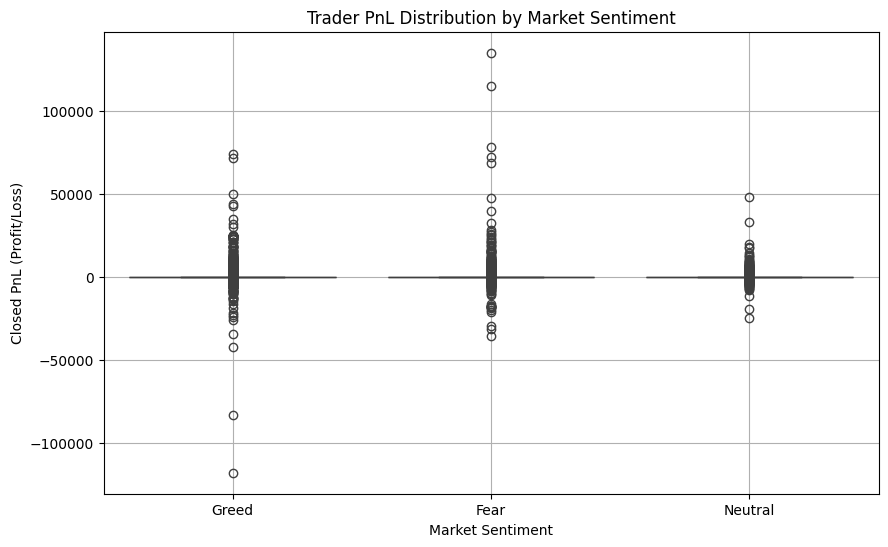

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean small NaN residue
df_clean = df.dropna(subset=['Closed PnL', 'sentiment'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='sentiment', y='Closed PnL')
plt.title("Trader PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL (Profit/Loss)")
plt.grid(True)
plt.show()


# Insights
* Medain of PnL values looks very close to zero => most traders didnt make a profit or a loss possibily there break even on all fear greed and neutral days
* on the days of greed we have most negative outliers
* on the days of fear we have most positive outliers
* neutral flattens out

In [85]:
df_clean['win'] = df_clean['Closed PnL'] > 0

win_rate = df_clean.groupby('sentiment')['win'].mean().reset_index()
win_rate.columns = ['Sentiment', 'Win Rate']

print(win_rate)


  Sentiment  Win Rate
0      Fear  0.407871
1     Greed  0.420311
2   Neutral  0.396991


/tmp/ipykernel_4599/1588540363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['win'] = df_clean['Closed PnL'] > 0


# insight
* greed days have most number of people making profit followed by days of fear followed by neutral

/tmp/ipykernel_4599/2337621705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_sell_winrate['win'] = buy_sell_winrate['Closed PnL'] > 0


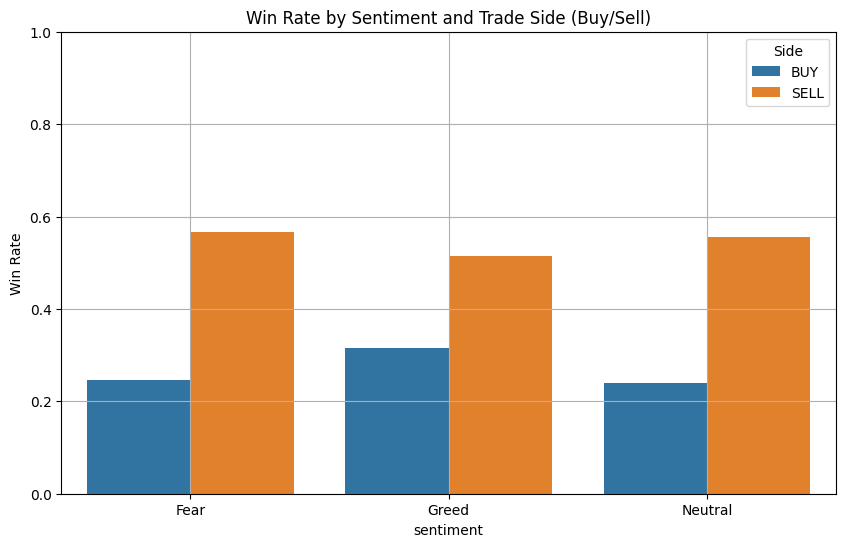

In [90]:
buy_sell_winrate = df_clean
buy_sell_winrate['win'] = buy_sell_winrate['Closed PnL'] > 0

result = (
    buy_sell_winrate
    .groupby(['sentiment', 'Side'])['win']
    .mean()
    .reset_index()
    .rename(columns={'win': 'Win Rate'})
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='sentiment', y='Win Rate', hue='Side')
plt.title("Win Rate by Sentiment and Trade Side (Buy/Sell)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# insight
* this shows under all sentiments sell dominated over buy

In [92]:
top_traders = (
    df_clean.groupby('Account')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_traders)


Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    3.605395e+05
Name: Closed PnL, dtype: float64


* top 10 accounts

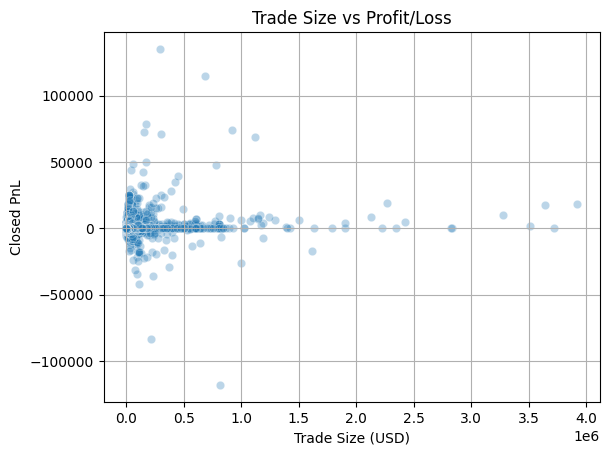

In [93]:
import seaborn as sns
sns.scatterplot(data=df_clean, x='Size USD', y='Closed PnL', alpha=0.3)
plt.title("Trade Size vs Profit/Loss")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.show()


# insight
* Small trades (< $500k) dominate the data volume — but also show the widest range of PnL (big wins & losses).

* Large trades (> $1M) have:

* Less variation in PnL

* Mostly modest profits

* Very few extreme losses or wins



#  Conclusion & Final Insights

## Key Findings

- **Greed days** had the highest win rate (~42%) — reflecting broader market optimism and easier entries.
- **Fear days** showed the **largest profit outliers** — fewer winners, but bigger ones, suggesting contrarian strategies thrive here.
- **Neutral days** had the worst performance — lowest win rate and narrow PnL range, likely due to indecisive market movement.

##  Strategic Implications

> - For risk-takers: **Fear days** offer asymmetric opportunities  
> - For consistent gains: **Greed days** are more favorable  
> - For risk management: avoid overtrading during **Neutral sentiment**

##  What This Shows

This analysis demonstrates how **sentiment signals can shape trading outcomes**, and how **data-driven insights can help optimize strategy selection**.

---

# 🙌 Thank You

This notebook was submitted as part of the assignment for **Junior Data Scientist – Trader Behavior Insights**.

📧 For any follow-up, I can be reached at: mavnish604@gmail.com 
🔗 GitHub: https://github.com/mavnish604

